<a href="https://colab.research.google.com/github/nordop/Projects/blob/main/Clustering_cars_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Примените методы машинного обучения для выявления кластеров (сегментов) автомобилей.

Проинтерпретируйте полученные сегменты: опишите типичного представителя каждого кластера, выделив его ключевые характеристики.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df_clear = pd.read_csv('/content/clear cars features.csv')

Попробуем применить методы машинного обучения. Проведем кластеризацию на необработанных данных

In [ ]:
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',	'Driven_Wheels', 'Vehicle Size',	'Vehicle Style']
numeric_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG',	'city mpg',	'Popularity',	'Price']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Стандартизация числовых признаков
        ('cat', OneHotEncoder(), categorical_features)  # One-Hot Encoding для категориальных признаков
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=5, random_state=20))
])

df_clear['cluster'] = pipeline.fit_predict(df_clear)
print(df_clear)

       Unnamed: 0     Make       Model  Year                Engine Fuel Type  \
0               0      BMW  1 Series M  2011     premium unleaded (required)   
1               1      BMW    1 Series  2011     premium unleaded (required)   
2               2      BMW    1 Series  2011     premium unleaded (required)   
3               3      BMW    1 Series  2011     premium unleaded (required)   
4               4      BMW    1 Series  2011     premium unleaded (required)   
...           ...      ...         ...   ...                             ...   
10197       11909    Acura         ZDX  2012     premium unleaded (required)   
10198       11910    Acura         ZDX  2012     premium unleaded (required)   
10199       11911    Acura         ZDX  2012     premium unleaded (required)   
10200       11912    Acura         ZDX  2013  premium unleaded (recommended)   
10201       11913  Lincoln      Zephyr  2006                regular unleaded   

       Engine HP  Engine Cylinders Tran

Как мы видим, алгоритм хоть и разделил массив данных по кластерам, но сделал это не эффективно.

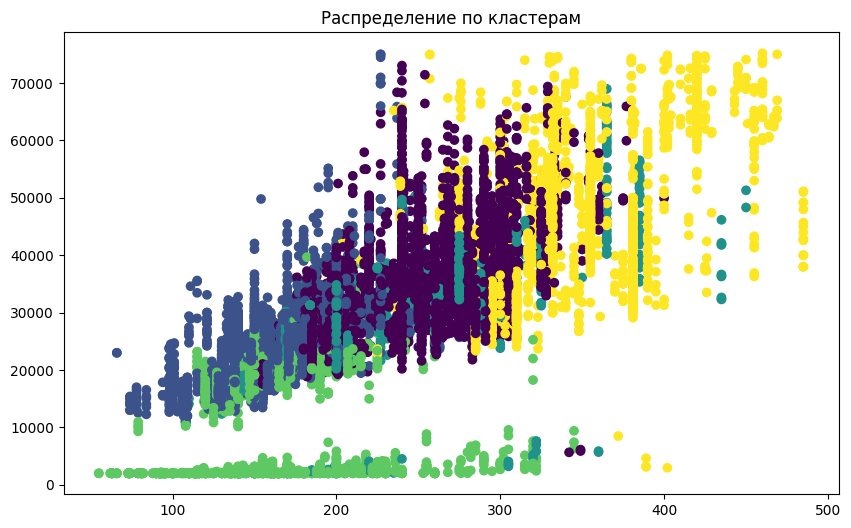

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_clear['Engine HP'], df_clear['Price'], c=df_clear['cluster'], cmap='viridis')
ax.set_title('Распределение по кластерам')
plt.show()

Подготовка данных

In [ ]:
# преобразование категориальных признаков в числовые

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Создаем копию DataFrame для преобразований
df_encoded = df_clear.copy()

# 1. Для признаков с малым числом уникальных значений: One-Hot Encoding
small_features = [
    'Engine Fuel Type',
    'Transmission Type',
    'Driven_Wheels',
    'Vehicle Size',
    'Vehicle Style'
]

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df_encoded[small_features])
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(small_features),
    index=df_encoded.index
)


# 3. Объединяем результаты и удалим столбцы с маркой и моделью ввиду слишком большой кардиналоности данных
df_encoded = pd.concat([
    df_encoded.drop(small_features + ['Make', 'Model'], axis=1),
    encoded_df
], axis=1)

# Теперь все признаки числовые
print(df_encoded.head())

   Unnamed: 0  Year  Engine HP  Engine Cylinders  Number of Doors  \
0           0  2011      335.0               6.0              2.0   
1           1  2011      300.0               6.0              2.0   
2           2  2011      300.0               6.0              2.0   
3           3  2011      230.0               6.0              2.0   
4           4  2011      230.0               6.0              2.0   

   highway MPG  city mpg  Popularity  Price  cluster  ...  \
0           26        19        3916  46135        4  ...   
1           28        19        3916  40650        2  ...   
2           28        20        3916  36350        2  ...   
3           28        18        3916  29450        2  ...   
4           28        18        3916  34500        2  ...   

   Vehicle Style_Convertible  Vehicle Style_Convertible SUV  \
0                        0.0                            0.0   
1                        1.0                            0.0   
2                        0.0 

In [ ]:
#Стандартизация данных
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df_encoded))

#Теперь данные подходят для применения метода главных компонент
pca = PCA(n_components = 5)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3', 'PC4', 'PC5'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,1.410230,-2.198699,4.039909,-2.904345,0.374271
1,0.877975,-1.902437,3.820328,-3.164865,0.363422
2,0.796787,-2.136675,3.618499,-2.888821,0.413906
3,0.516693,-2.502109,3.305946,-2.810724,0.343652
4,0.569101,-2.236156,3.544303,-3.074323,0.299777


<Axes: >

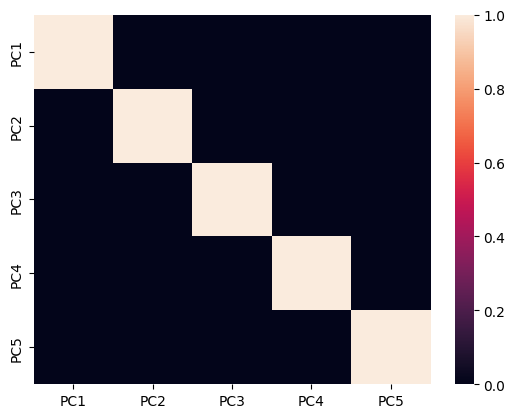

In [ ]:
#Проверка на корреляцию
sns.heatmap(data_pca.corr())

Кластеризация новых данных

In [ ]:
features = ['PC1','PC2','PC3', 'PC4', 'PC5']
X = data_pca[features]

# Применяем алгоритм K-means
kmeans = KMeans(n_clusters=5, random_state=17)
kmeans.fit(X)

# Добавляем метки кластеров к данным
data_pca['Cluster'] = kmeans.labels_
print(data_pca)

            PC1       PC2       PC3       PC4       PC5  Cluster
0      1.410230 -2.198699  4.039909 -2.904345  0.374271        1
1      0.877975 -1.902437  3.820328 -3.164865  0.363422        1
2      0.796787 -2.136675  3.618499 -2.888821  0.413906        1
3      0.516693 -2.502109  3.305946 -2.810724  0.343652        1
4      0.569101 -2.236156  3.544303 -3.074323  0.299777        1
...         ...       ...       ...       ...       ...      ...
10197  0.469765  2.224065  0.211330 -1.104276  0.977227        4
10198  0.589178  2.457814  0.342377 -1.192767  1.024538        4
10199  0.520733  2.323800  0.267188 -1.141933  0.997486        4
10200  0.271239  2.416688  0.141676 -1.039425  0.704043        4
10201 -0.730563  0.958662 -2.126228 -0.201730 -0.593581        2

[10202 rows x 6 columns]


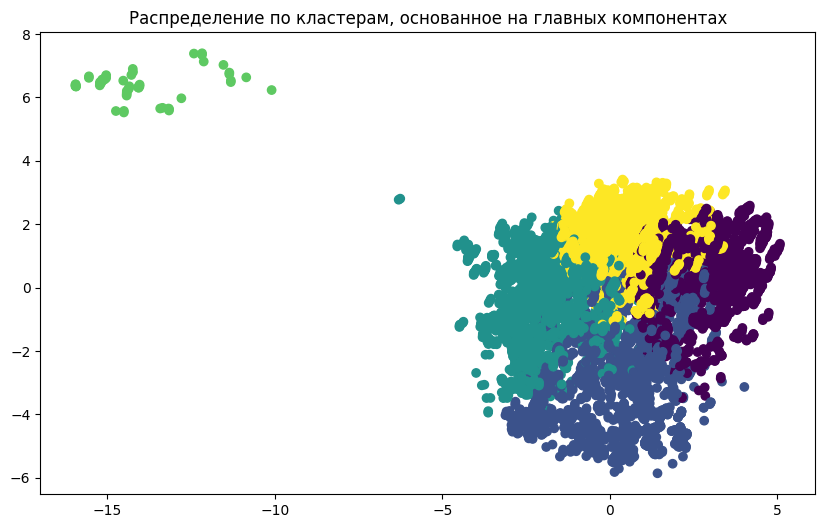

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_pca['PC1'], data_pca['PC2'], c=data_pca['Cluster'], cmap='viridis')
ax.set_title('Распределение по кластерам, основанное на главных компонентах')
plt.show()

Интерпретация результатов

Средние значения признаков по кластерам:
            Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
Cluster                                                                       
0        2012.36     306.61              7.05             3.74        21.26   
1        2004.89     219.57              5.44             2.23        25.20   
2        2010.11     167.35              4.38             3.81        31.92   
3        2015.39     195.91              1.12             3.89       104.25   
4        2013.37     252.99              5.33             3.96        25.85   

         city mpg  Popularity     Price  
Cluster                                  
0           15.36     2132.41  38470.82  
1           18.28     1710.33  22570.60  
2           24.13     1433.26  20532.32  
3          114.77     1863.91  39518.25  
4           18.95     1223.86  37288.66  


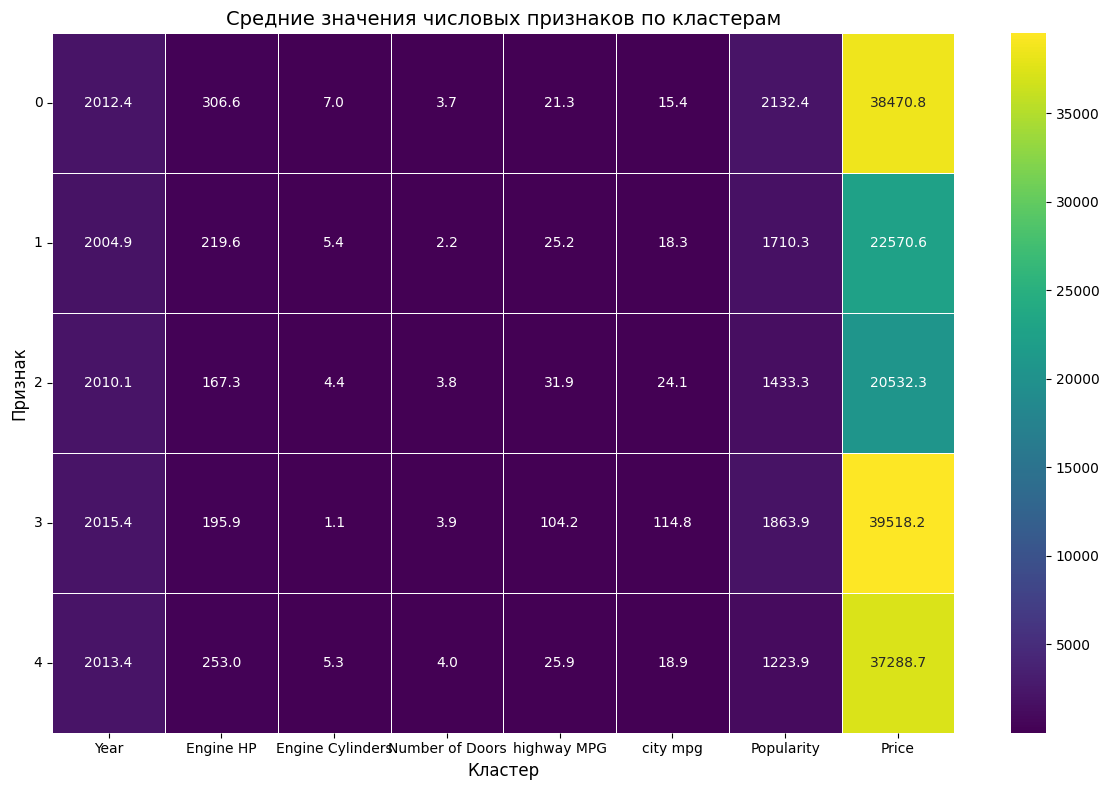

In [ ]:
# 1. Добавляем метки кластеров в исходный DataFrame

df_clear['Cluster'] = data_pca['Cluster']  # Добавляем метки кластеров в исходные данные

# 2. Группируем по кластерам и вычисляем средние значения числовых признаков
cluster_stats = df_clear.groupby('Cluster')[numeric_features].mean()
cluster_stats = round(cluster_stats, 2)

# 3. Выводим статистику
print("Средние значения признаков по кластерам:")
print(cluster_stats)

# 4. Визуализация тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(
    cluster_stats,   # Транспонируем для лучшей читаемости
    annot=True,        # Показываем значения в ячейках
    cmap='viridis',   # Цветовая схема
    fmt=".1f",         # Формат чисел (1 знак после запятой)
    linewidths=.5      # Толщина линий между ячейками
)

plt.title('Средние значения числовых признаков по кластерам', fontsize=14)
plt.xlabel('Кластер', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Мы выявили 5 ключевых сегментов на автомобильном рынке. Анализ средних характеристик автомобилей в каждом кластере позволил дать им следующую бизнес-интерпретацию:

Кластер 0: "Премиум"

В этот сегмент вошли самые дорогие автомобили с мощными двигателями (высокий Engine HP), большим количеством цилиндров и, как следствие, низкими показателями экономичности (city/highway MPG). Это преимущественно автомобили последних лет выпуска с высокой популярностью.

Кластер 1: "Стандарт"

Самый сбалансированный и массовый сегмент. Автомобили свежих годов выпуска со средними показателями мощности, цены и расхода топлива. Обладают умеренной популярностью.


Кластер 2: "Экономичный транспорт"

Наиболее доступные по цене автомобили с маломощными двигателями и лучшими показателями топливной экономичности. Год выпуска варьируется.

Кластер 3: "Старые"

Сегмент, характеризующийся автомобилями более старших годов выпуска. Несмотря на это, у них довольно мощные двигатели (6-8 цилиндров) и средняя цена. Скорее всего, это утилитарные и надежные машины.

Кластер 4: "Популярные"

Интересный сегмент, сочетающий в себе высокую мощность двигателя и очень высокую популярность, но при этом умеренную цену (ниже, чем в премиум-сегменте).